In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [36]:
heart=pd.read_csv('heart.csv')
o2=pd.read_csv('o2Saturation.csv')

In [37]:
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [38]:
heart.info()
#all numeric columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [39]:
heart.shape

(303, 14)

In [40]:
heart.isnull().sum()
#no null values

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [41]:
heart.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [42]:
heart.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

The Attributess include:
Age: age of the patient [years]
Sex: sex of the patient [M: Male, F: Female]
ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
RestingBP: resting blood pressure [mm Hg]
Cholesterol: serum cholesterol [mm/dl]
FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
Oldpeak: oldpeak = ST [Numeric value measured in depression]
ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
HeartDisease: output class [1: heart disease, 0: Normal]

In [43]:
#SPLIT THE NUMERIC, CATEGORICAL AND OUTPUT COLUMNS
num_cols=['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
cat_cols=['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']
output_cols=['output']

In [44]:
heart['output'].value_counts()

output
1    165
0    138
Name: count, dtype: int64

EXPLORATORY DATA ANALYSIS - UNIVARIATE

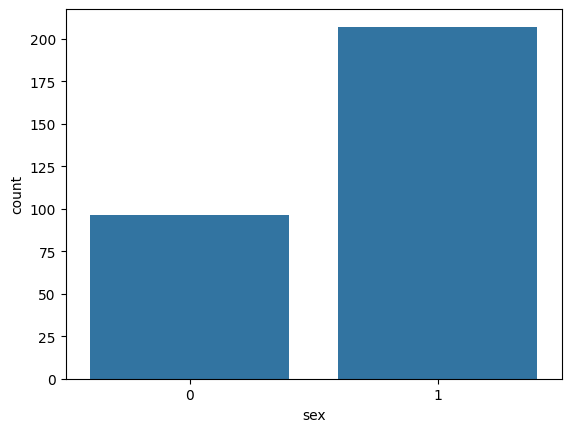

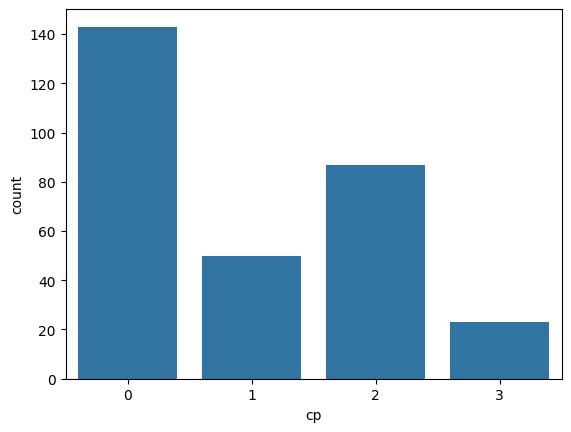

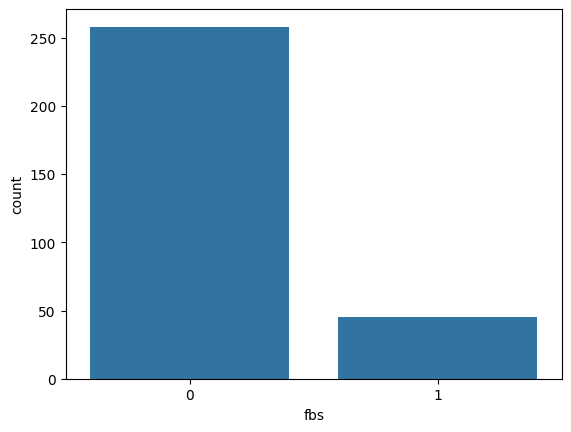

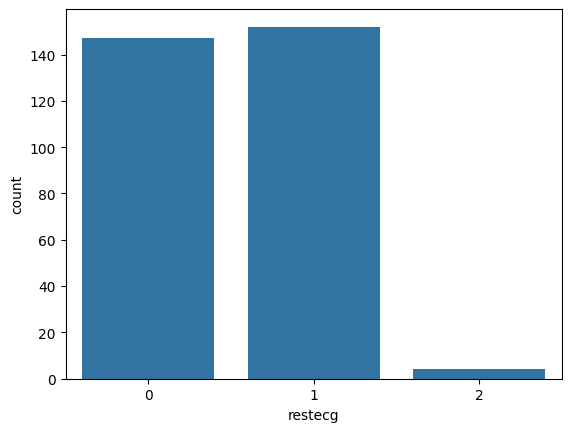

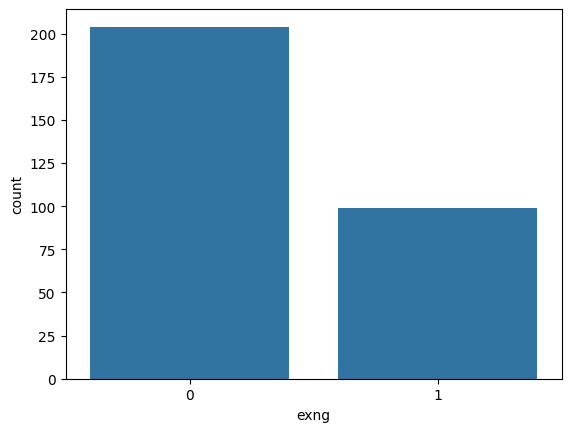

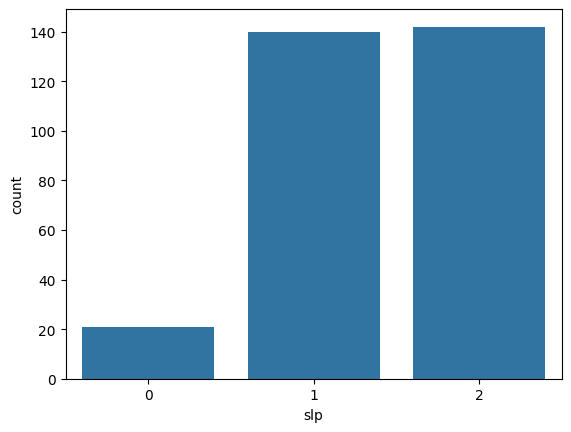

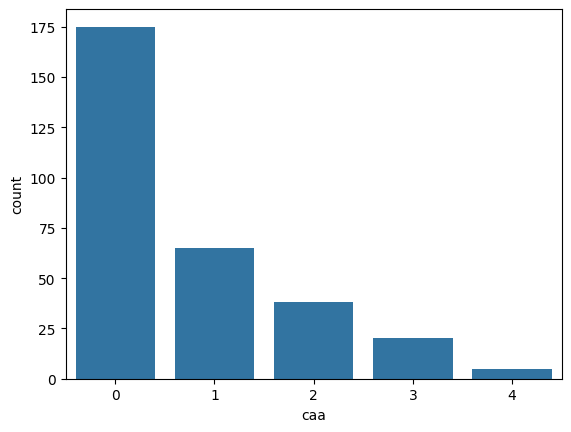

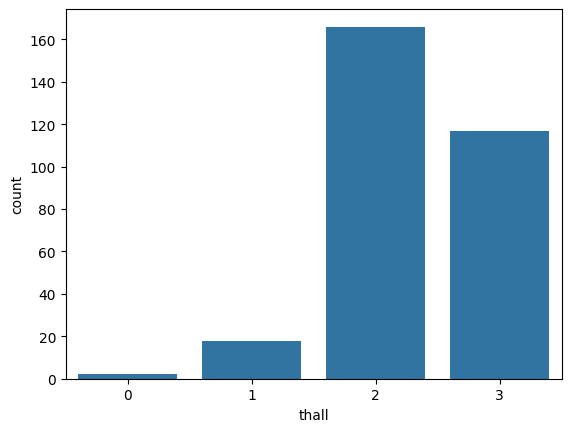

In [45]:
for i in cat_cols:
    plt.figure()
    sns.countplot(data=heart,x=i)


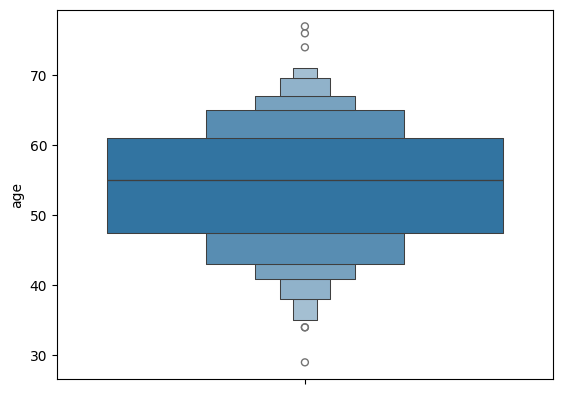

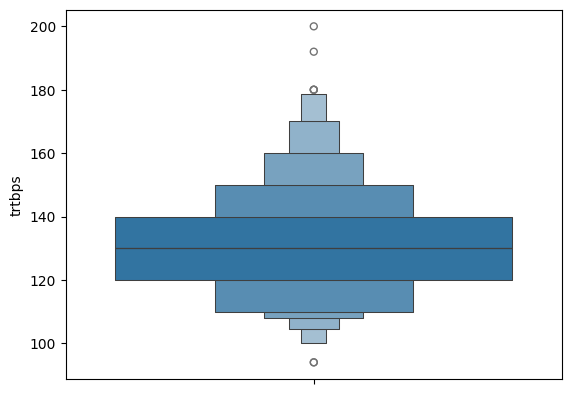

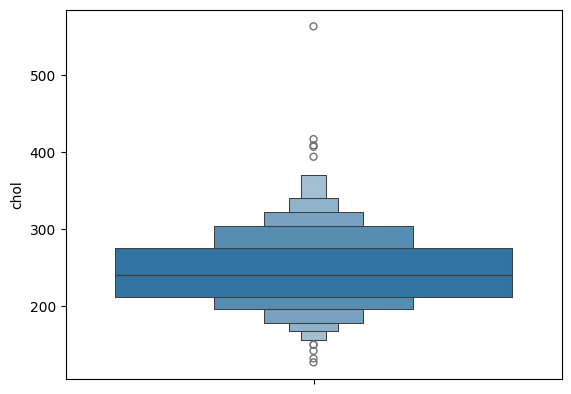

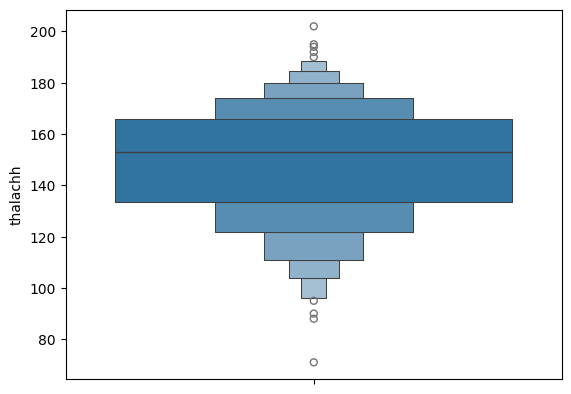

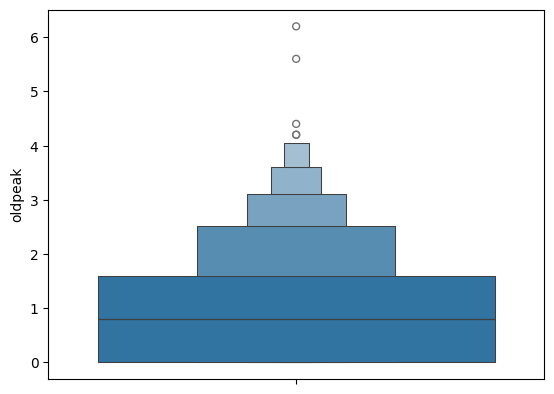

In [46]:
for i in num_cols:
    plt.figure()
    sns.boxenplot(y=heart[i])

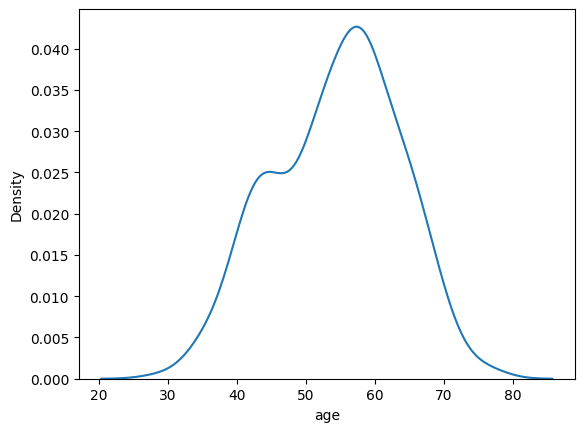

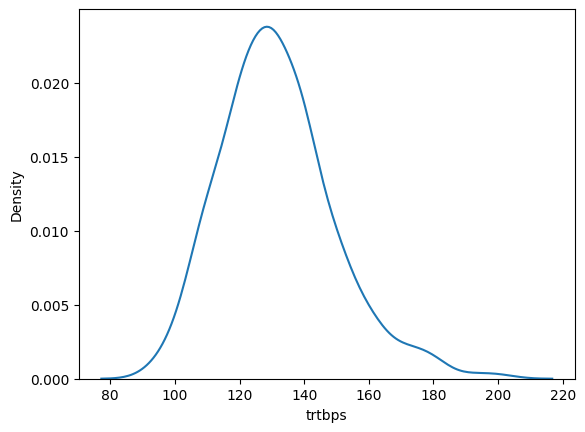

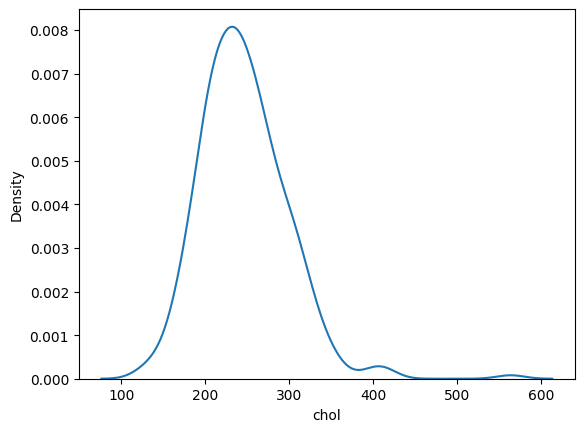

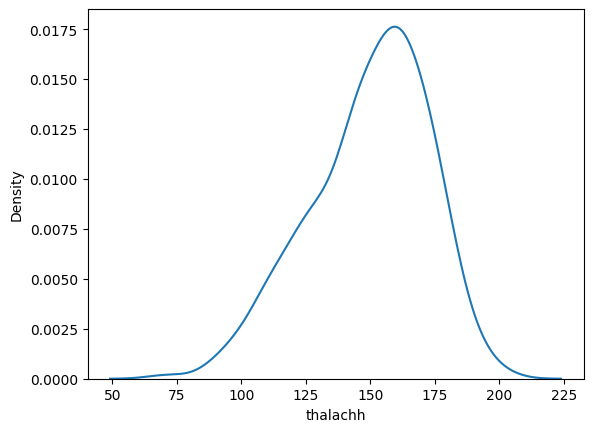

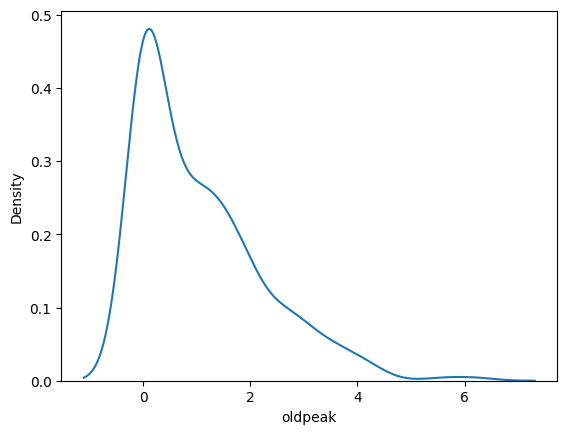

In [47]:
for i in num_cols:
    plt.figure()
    sns.kdeplot(data=heart, x=i)

OBSERVATIONS from UNIVARIATE
1. more men in dataset
2. fbs value of 0 more prevelant, skewed feature
3. restecg value of 2 is low in dataset
4. slp value of 0 is low in dataset
5. All features normally distrbuted except for oldpeak


EDA - BIVARIATE

In [48]:
heart_corr=heart[num_cols+output_cols].corr()
heart_corr.T

,age,trtbps,chol,thalachh,oldpeak,output
age,1.000000,0.279351,0.213678,-0.398522,0.210013,-0.225439
trtbps,0.279351,1.000000,0.123174,-0.046698,0.193216,-0.144931
chol,0.213678,0.123174,1.000000,-0.009940,0.053952,-0.085239
thalachh,-0.398522,-0.046698,-0.009940,1.000000,-0.344187,0.421741
oldpeak,0.210013,0.193216,0.053952,-0.344187,1.000000,-0.430696
output,-0.225439,-0.144931,-0.085239,0.421741,-0.430696,1.000000


<Axes: >

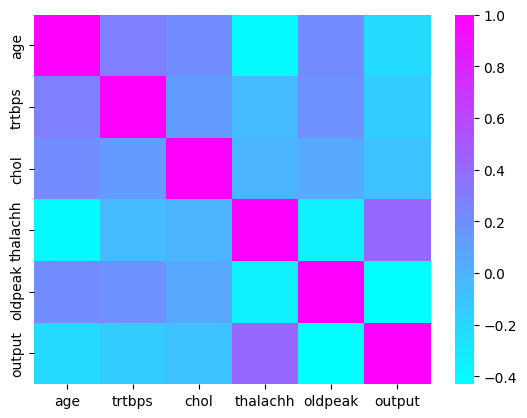

In [49]:
sns.heatmap(heart_corr, cmap='cool')

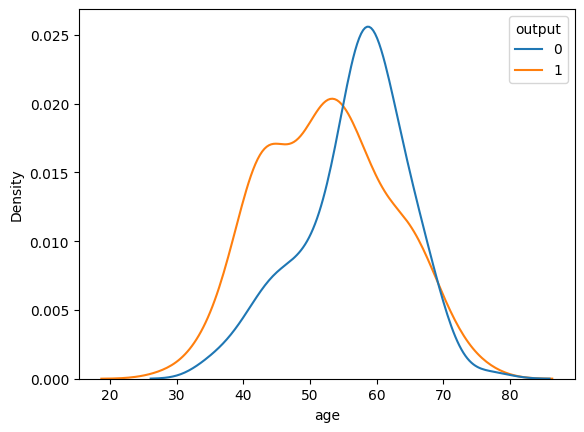

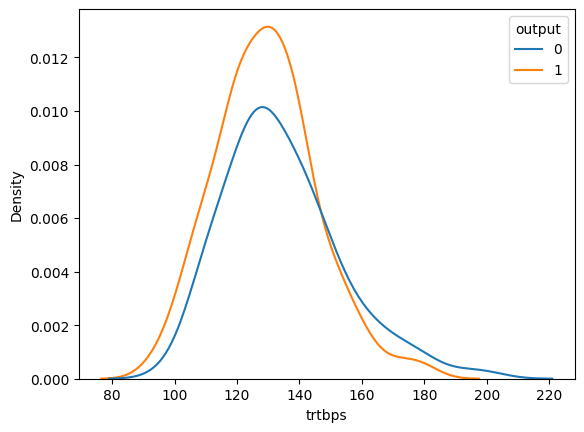

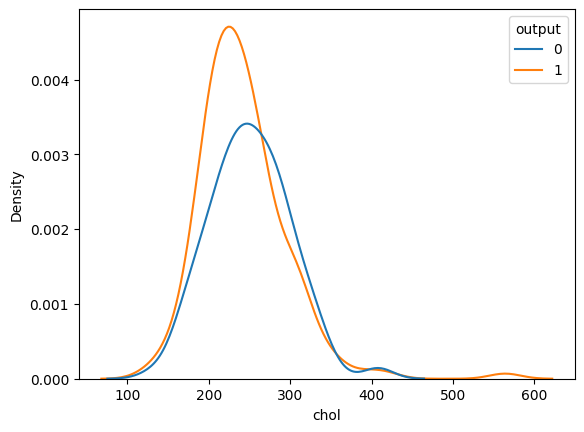

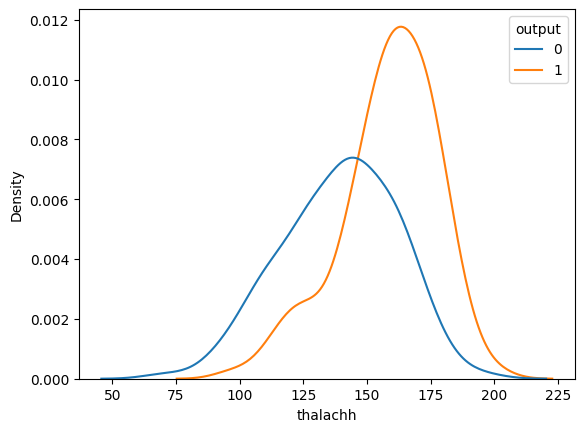

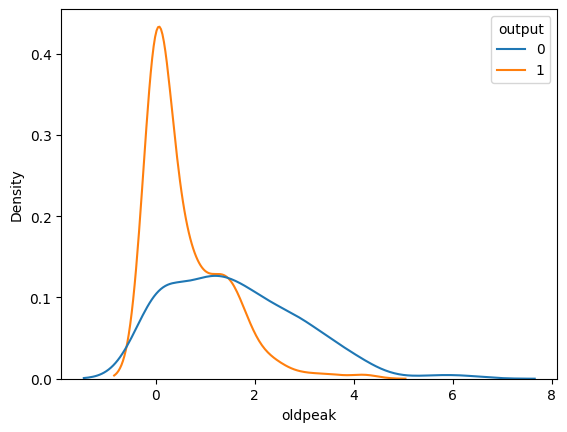

In [50]:
for i in num_cols:
    plt.figure()
    sns.kdeplot(data=heart, x=i, hue=output_cols[0])

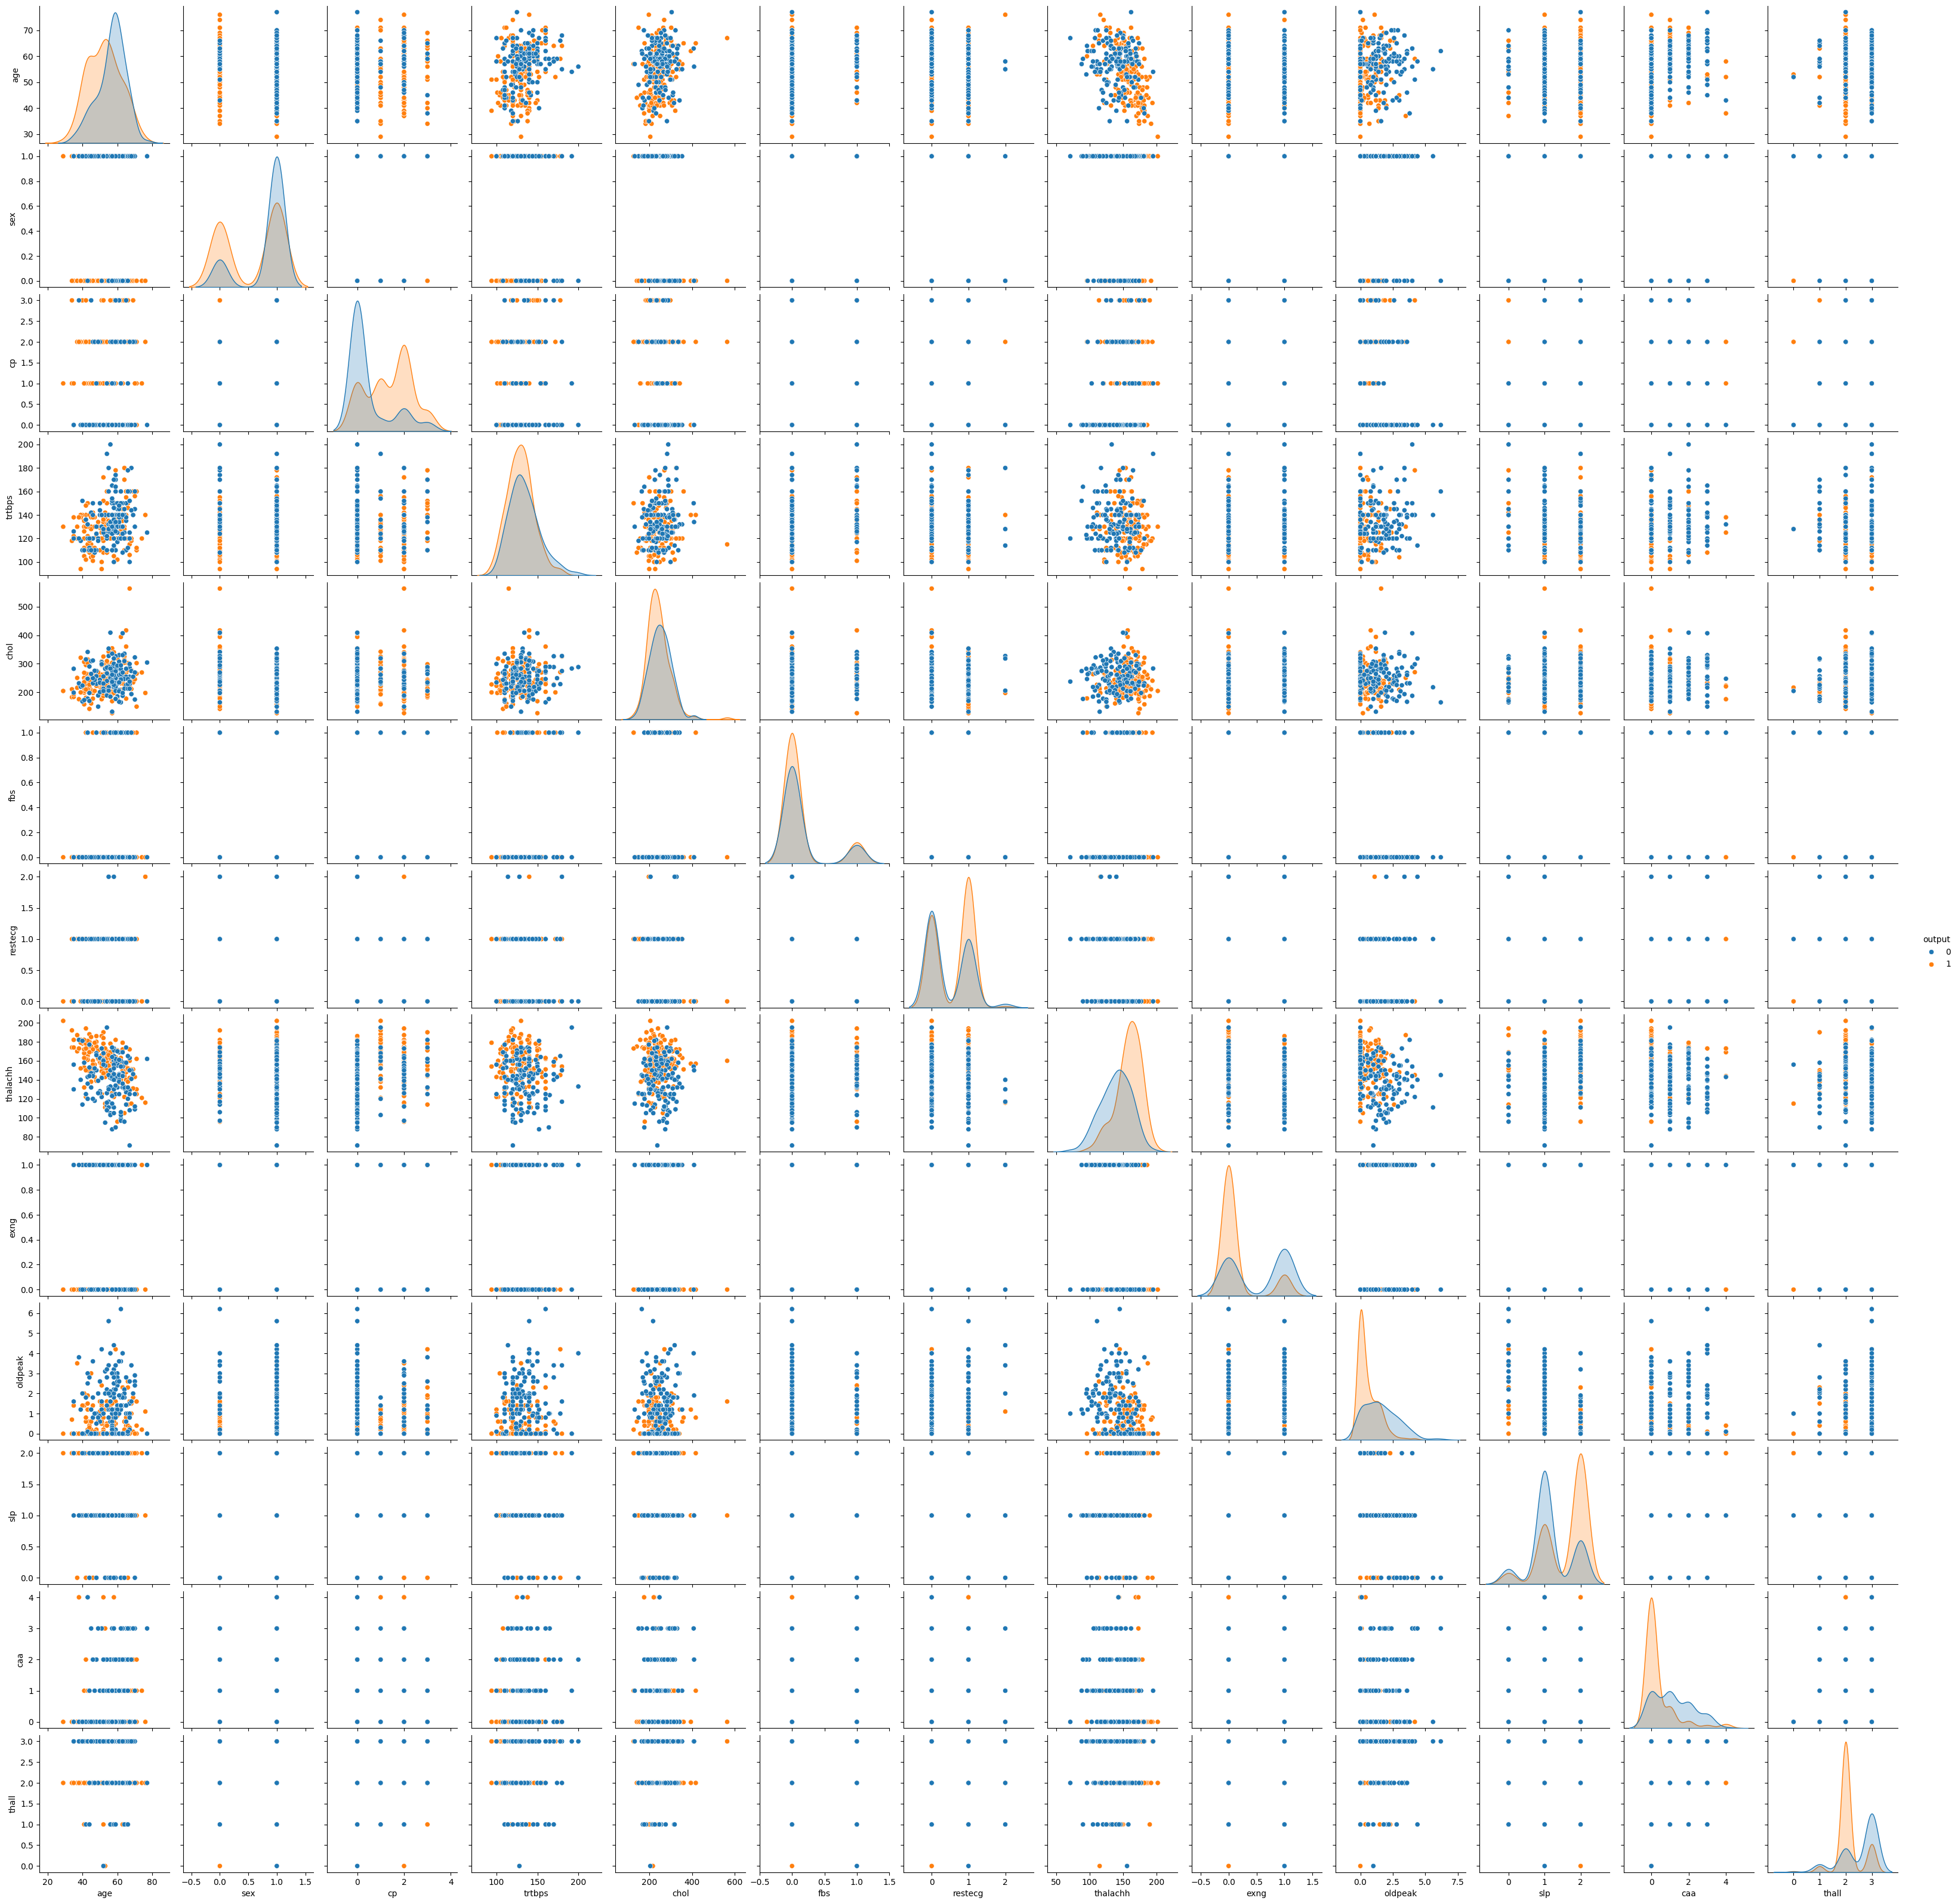

In [51]:
sns.pairplot(data=heart, hue='output')

chi2 test for feature selection 

In simple words, higher the Chi-Square value the feature is more dependent on the response and it can be selected for model training.

low p-values indicate that the features are correlated with the output 

[5.91231763e-03 2.53498179e-15 6.52363208e-01 8.43893904e-02
 4.42807388e-10 1.74123685e-03 3.60567663e-16 1.61006098e-02]


<BarContainer object of 8 artists>

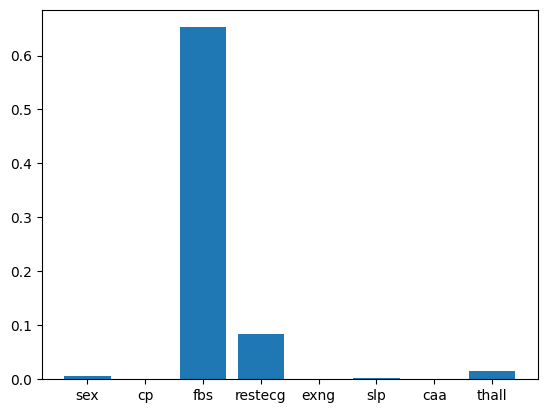

In [52]:
import numpy as np
from sklearn.feature_selection import chi2
chi2_stats, p_values = chi2(heart[cat_cols], heart[output_cols])
#print(chi2_stats)
print(p_values)

fig,ax=plt.subplots()
#plt.bar(cat_cols, p_values)
#ax.set_xticklabels(cat_cols)
plt.bar(cat_cols, p_values)


OBSERVATIONS FROM BIVARIATE EDA

1. Output shows positive correlation with thalacchh, negative correlation with oldpeak
2. high p-values for fbs and restecg show that they may not be correlated with output variable
3. based on the distribution plots, age, cp thalachh, exng, sfp and caa may be good predictors

Data standardization, One-hot-encoding, train_test_split

In [53]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

df=heart.copy()

process the X_train set

In [54]:
#df=heart.copy()
df=pd.get_dummies(df, columns=cat_cols, drop_first=True)
print(df.shape)

(303, 23)


In [55]:
X=df.drop(['output'],axis=1)
y=df[['output']]

In [56]:
X.head()


,age,trtbps,chol,thalachh,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,63,145,233,150,2.3,True,False,False,True,True,...,False,False,False,False,False,False,False,True,False,False
1,37,130,250,187,3.5,True,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
2,41,130,204,172,1.4,False,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
3,56,120,236,178,0.8,True,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
4,57,120,354,163,0.6,False,False,False,False,False,...,True,False,True,False,False,False,False,False,True,False


partition inputs and outputs

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test=train_test_split(X, y, test_size=0.2, random_state=42)

separate train and test

In [58]:
scaler=RobustScaler() #good for outliers since it uses IQR
X_train[num_cols]=scaler.fit_transform(X_train[num_cols])
X_train.head()


,age,trtbps,chol,thalachh,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
132,-1.038462,-0.50,0.884462,0.268908,-0.500,True,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
202,0.192308,1.00,0.486056,-1.445378,0.000,True,False,False,False,False,...,True,False,True,False,False,False,False,False,False,True
196,-0.730769,1.00,-0.135458,-0.235294,1.750,True,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
75,-0.038462,0.25,0.167331,0.235294,0.375,False,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
176,0.346154,-0.65,-0.151394,0.201681,0.375,True,False,False,False,True,...,True,False,True,False,True,False,False,False,False,True


In [59]:
X_train.shape

(242, 22)

In [60]:
#APPLY THE SCALER TO THE TEST SET
X_test[num_cols]=scaler.transform(X_test[num_cols])
X_test.shape


(61, 22)

build classification models


In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

logreg=LogisticRegression()
logreg.fit(X_train,Y_train)
y_pred_proba=logreg.predict_proba(X_test)
y_pred=logreg.predict(X_test)

c:\Users\Harsh Vora\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Measure the model

In [65]:
y_pred_proba

array([[0.97387807, 0.02612193],
       [0.55210857, 0.44789143],
       [0.36114249, 0.63885751],
       [0.975982  , 0.024018  ],
       [0.06237957, 0.93762043],
       [0.07726976, 0.92273024],
       [0.35986703, 0.64013297],
       [0.99377989, 0.00622011],
       [0.98628016, 0.01371984],
       [0.43405163, 0.56594837],
       [0.45929971, 0.54070029],
       [0.88582575, 0.11417425],
       [0.07797511, 0.92202489],
       [0.94566565, 0.05433435],
       [0.01550682, 0.98449318],
       [0.04998727, 0.95001273],
       [0.02258691, 0.97741309],
       [0.95922929, 0.04077071],
       [0.99254389, 0.00745611],
       [0.98461435, 0.01538565],
       [0.57716098, 0.42283902],
       [0.9225949 , 0.0774051 ],
       [0.63150543, 0.36849457],
       [0.25189987, 0.74810013],
       [0.18087586, 0.81912414],
       [0.38033475, 0.61966525],
       [0.12531813, 0.87468187],
       [0.29357299, 0.70642701],
       [0.95672752, 0.04327248],
       [0.04678141, 0.95321859],
       [0.

In [68]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, roc_curve
log_reg_acc=accuracy_score(Y_test, y_pred)
log_reg_f1=f1_score(Y_test, y_pred)
log_reg_report=classification_report(Y_test, y_pred)
print(log_reg_acc)
print(log_reg_f1)
print(log_reg_report)


0.9016393442622951
0.9032258064516129
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



Predict using SVM and hyperparameter turning

In [72]:
from sklearn.model_selection import GridSearchCV

svm=SVC()
parameters={"C":np.arange(1,10,1), 'gamma':[0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5]}
searcher=GridSearchCV(svm, parameters)
searcher.fit(X_train, Y_train)
print(searcher.best_params_)
print(searcher.best_score_)

y_pred_svm=searcher.predict(X_test)


c:\Users\Harsh Vora\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Harsh Vora\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Harsh Vora\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Harsh Vora\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\valid

{'C': 3, 'gamma': 0.1}
0.8384353741496599


c:\Users\Harsh Vora\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Harsh Vora\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Harsh Vora\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Harsh Vora\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\valid

In [73]:
svm_acc=accuracy_score(Y_test, y_pred_svm)
svm_f1=f1_score(Y_test, y_pred_svm)
svm_report=classification_report(Y_test, y_pred_svm)
print(svm_acc)
print(svm_f1)
print(svm_report)


0.9016393442622951
0.90625
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        29
           1       0.91      0.91      0.91        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



Explainability using SHAP values

In [90]:
import shap
shap.initjs()

explainer = shap.LinearExplainer(logreg, X_train)

shap_values=explainer.shap_values(X_test)

In [91]:
shap_values

array([[0.022939426489192827, -0.3074755658608603, -0.046273238430683684,
        ..., 0.18588312494645182, -0.3065103321875582,
        0.2709586746865723],
       [0.038544478522657334, -0.6299460072461358, -0.06798926741653445,
        ..., -0.011864880315730967, -0.3065103321875582,
        -0.5032089672750629],
       [0.022939426489192827, -0.3074755658608603, 0.22517712389245095,
        ..., -0.011864880315730967, -0.3065103321875582,
        -0.5032089672750629],
       ...,
       [0.10876721267324763, -0.2107344334452776, 0.10392929538811749,
        ..., -0.011864880315730967, -0.3065103321875582,
        -0.5032089672750629],
       [0.046347004539389586, -0.22685795551454138, -0.05713125292360905,
        ..., -0.011864880315730967, -0.3065103321875582,
        -0.5032089672750629],
       [-0.031678255627932944, -0.3074755658608603, 0.013445841280405943,
        ..., -0.011864880315730967, -0.3065103321875582,
        -0.5032089672750629]], dtype=object)

In [96]:
shap.summary_plot(shap_values, Y_test, feature_names=all_features)

AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.